# House Price Prediction

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## PREPARE DATA

In [2]:
# Load data and set columns
data = pd.read_csv('./Dataset/USA_Housing.csv')

In [3]:
# Head of data
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
# Data describe
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
# Data columns
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## SOME PLOTS

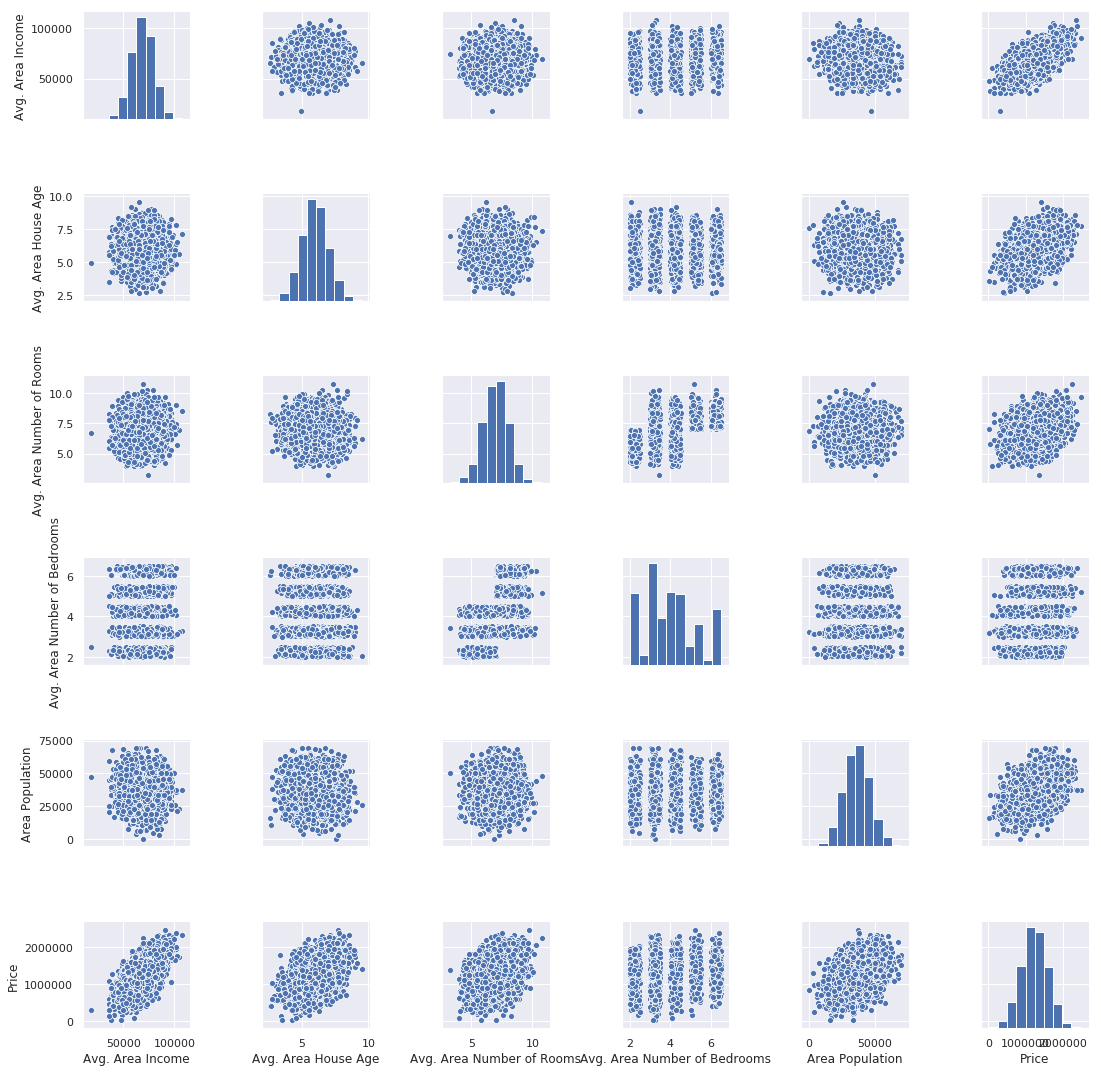

In [7]:
# Comparison of all columns
sns.pairplot(data)

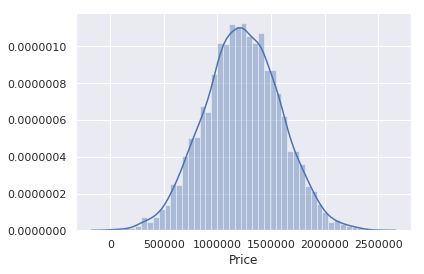

In [8]:
# Price plot 
sns.distplot(data['Price'])

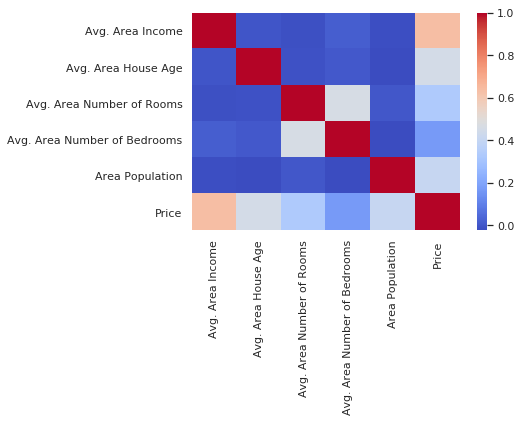

In [9]:
# Correlation between columns
sns.heatmap(data.corr(), cmap='coolwarm')

## CREATE MODEL

In [10]:
# Features and labels
X = data.drop(['Address', 'Price'], axis=1)
y = data['Price']

In [11]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [12]:
# Standardize features
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Number of features
n_dim = 5

# Placeholders
x = tf.placeholder(tf.float32, shape=[None, n_dim])
y_true = tf.placeholder(tf.float32, shape=[None])

In [14]:
# Variables
a = tf.Variable(tf.random.uniform(shape=[1]))
b = tf.Variable(tf.random.uniform(shape=[1]))
c = tf.Variable(tf.random.uniform(shape=[1]))
d = tf.Variable(tf.random.uniform(shape=[1]))
e = tf.Variable(tf.random.uniform(shape=[1]))
f = tf.Variable(tf.random.uniform(shape=[1]))

### LINEAR EQUATION
<img src="./Images/lr_equation.gif" alt="drawing" align="left" width="200"/>

In [15]:
# Linear equation 
y_pred = a*x[:,0] + b*x[:,1] + c*x[:,2] + d*x[:,3] + e*x[:,4] + f

In [16]:
# Error
error  = tf.reduce_mean(tf.square(y_pred - y_true))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [ ]:
# Number of epochs
n_epoch = 4000

# Init global variables
init = tf.initializers.global_variables()

# Create session
with tf.Session() as sess:
        sess.run(init)

        for epoch in range(n_epoch):
                        
            #TRAIN MODEL
            sess.run(train, feed_dict={x: X_train, y_true: y_train})    
            
            #Line to grab error
            err = sess.run(error, feed_dict={x: X_train, y_true: y_train})
            
            #Print error
            print('Epoch: {}. Error: {:.2f}'.format(epoch, err))
            
            #Grab predictions
            predictions = sess.run([y_pred], feed_dict={x: X_test})

## Plot tested labels vs predicitons

In [18]:
# Reshape prediction's list to the same shape as y_test
predictions = np.reshape(predictions, (2000,))

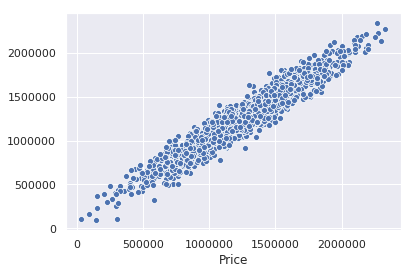

In [19]:
# Scatter plot for y_test vs predicitons
sns.scatterplot(y_test,predictions)

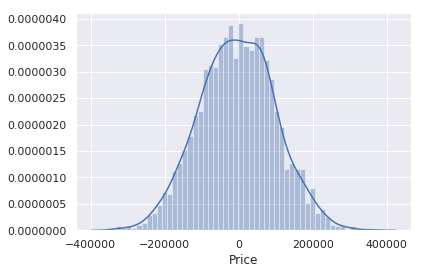

In [20]:
# Residual histogram
sns.distplot((y_test-predictions),bins=50);

In [21]:
# Show error metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82283.23315206855
MSE: 10456786153.17054
RMSE: 102258.42827449745
